# World Economic Indicators

The World Bank funds infrastructure projects in the developing world. As part of its mission, it releases an annual report on economic indicators. This dataset includes important indicators of economic performance and development from **1960-2018**, including fields like **electricity consumption**, **GDP per capita**, **life expectancy**, and more.

To augment the World Bank data, Human Development Index (HDI) data has been provided by **the United Nations (UN)**. HDI is a composite measure of how developed a country is based on **life expectancy**, **GDP per capita**, and **educational attainment**. This supplementary dataset contains additional indicators used by **the UN to track development**, **environmental impact**, and inequality for each country from **1990-2021**.

## Objective 1
**Prepare & QA the Data**

Your first objective is to get the data ready for analysis by importing and joining the data, creating new columns, and performing basic profiling and QA.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the World Bank Excel file and rename the "Country Name" column to "Country"
world_bank = pd.read_excel("WorldBank.xlsx").rename({"Country Name": "Country"}, axis=1)

# Calculate the population:
# Formula: Population = GDP (USD) / GDP per capita (USD)
# Divide by 1,000,000 to convert the result into millions (M)
world_bank["Population (M)"] = (
    world_bank["GDP (USD)"] / world_bank["GDP per capita (USD)"] / 1_000_000
)

# Explore the dataset
# Display the first 5 rows
world_bank.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [8]:
# Explore the dataset
# Display dataset structure and column information
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [9]:
# Display descriptive statistics for numeric columns
world_bank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


In [10]:
# Load the Human Development Index (HDI) CSV file
hdi = pd.read_csv("HDI.csv")

# Filter World Bank data for the year 2014
# and merge it with HDI data using "Country Code" from World Bank and "iso3" from HDI
wb_hdi_2014 = world_bank.query("Year == 2014").merge(
    hdi[["iso3","hdi_2014"]], 
    how= "left", 
    left_on="Country Code", 
    right_on="iso3"
)

# Explore the merged dataset
# Display the first 5 rows
wb_hdi_2014.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [11]:
# Explore the merged dataset
# Display descriptive statistics for numeric columns
wb_hdi_2014.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_2014
count,211.0,204.000000,204.000000,139.000000,2.010000e+02,201.000000,199.000000,190.000000,197.000000,208.000000,186.000000,201.000000,188.000000
mean,2014.0,20.859378,7.693044,4270.600563,3.907779e+11,17779.147856,45.738525,23.844211,71.832723,424.474198,8.077554,35.668407,0.709527
std,0.0,10.280302,2.706626,5981.464101,1.546117e+12,27113.375249,28.934518,21.750467,8.130386,1986.297846,6.019114,136.957226,0.152831
min,2014.0,7.900000,1.127000,39.055800,3.729180e+07,248.845000,0.990000,1.800000,49.891000,0.137154,0.190000,0.010972,0.370000
25%,2014.0,11.975000,5.836250,858.174500,6.047810e+09,2163.160000,17.730000,6.800000,66.370000,36.550050,3.767250,1.174332,0.581250
50%,2014.0,17.799000,7.501500,2588.300000,3.133500e+10,6684.800000,46.160000,15.050000,73.429000,88.684650,6.513000,7.130572,0.732000
75%,2014.0,28.663750,9.219250,5478.100000,2.060000e+11,20258.000000,69.890000,36.775000,77.583000,210.380000,10.809000,23.589826,0.824750
max,2014.0,47.988000,16.433000,53832.500000,1.750000e+13,189171.000000,98.160000,93.000000,83.980500,19478.800000,28.030000,1359.233706,0.952000


## Objective 2
**Prepare the data for visualization**

Your second objective is to transform and shape the data into tables that will be used as the source for data visualizations.

In [13]:
# Create a pivot table for GDP:
# Rows: Years | Columns: Regions | Values: Sum of GDP (USD)
gdp_pivot = world_bank.pivot_table(
    index="Year", 
    columns="Region", 
    values="GDP (USD)", 
    aggfunc="sum"
)

# Display the first 5 rows of the GDP pivot table
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [14]:
# Create a pivot table for Population:
# Rows: Years | Columns: Regions | Values: Sum of Population (in millions)
pop_pivot = world_bank.pivot_table(
    index="Year", 
    columns="Region", 
    values="Population (M)", 
    aggfunc="sum"
)

# Display the first 5 rows of the Population pivot table
pop_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [15]:
# Create a table showing the average HDI by region (for 2014):
# Group by Region → Calculate mean of HDI → Sort from highest to lowest
wb_hdi_by_region = (
    wb_hdi_2014
    .groupby("Region")
    .agg({"hdi_2014": "mean"})
    .sort_values("hdi_2014", ascending=False)
)

# Display the first 5 rows of the HDI-by-region table
wb_hdi_by_region.head()

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963


# Objective 3
**Visualize the data**

Your third objective is to create 5 charts to visualize trends, relationships, and comparisons across regions.

Text(0, 0.5, 'GDP (Trillons)')

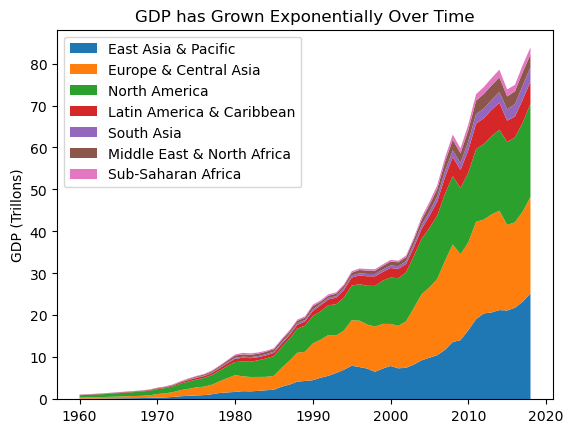

In [17]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Stacked Area Plot for GDP by Region over Time ---
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot a stacked area chart:
# x-axis: Years
# - y-values: GDP of each region (divided by 1,000,000,000,000 to convert to trillions)
# - Regions are sorted by the most recent year's GDP in descending order
ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= gdp_pivot.iloc[-1].sort_values(ascending=False).index
)

# Add a legend in the upper-left corner
ax.legend(loc="upper left")

# Add title and y-axis label
ax.set_title("GDP has Grown Exponentially Over Time")
ax.set_ylabel("GDP (Trillons)")

Text(0, 0.5, 'Population (Billions)')

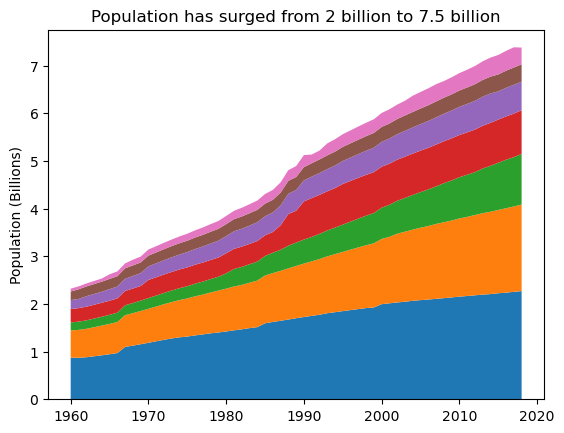

In [18]:
# --- Stacked Area Plot for Population by Region over Time ---

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot a stacked area chart:
# - x-axis: Years
# - y-values: Population of each region (divided by 1000 to convert from millions to billions)
# - Regions are sorted by the most recent year's population in descending order
ax.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= pop_pivot.iloc[-1].sort_values(ascending=False).index
)

# Add title and y-axis label
ax.set_title("Population has surged from 2 billion to 7.5 billion")
ax.set_ylabel("Population (Billions)")

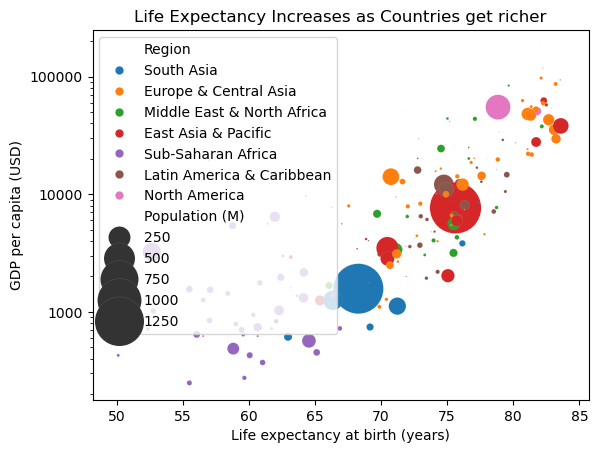

In [19]:
# --- Scatter Plot: Life Expectancy vs GDP per Capita ---

# Import required libraries
import matplotlib.ticker as mticker 

fig,ax = plt.subplots()


# Calculate the minimum and maximum population values (in millions)
# These will be used to scale the bubble sizes in the scatter plot
minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

# Create a scatter plot:
# - x-axis: Life expectancy at birth (years)
# - y-axis: GDP per capita (USD)
# - size: Population (M) → bubble size based on population
# - sizes=(minsize, maxsize) → scale bubble sizes between the smallest and largest population values
# - hue: Region → color points based on region
plot = sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes=(minsize,maxsize),
    hue="Region",
    ax = ax
)

# Set the y-axis to a logarithmic scale for better visualization of large value differences
plot.set(title="Life Expectancy Increases as Countries get richer", yscale="log")


# Format y-axis labels as normal numbers instead of scientific notation
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    

<Axes: title={'center': 'HDI by Region'}, xlabel='Region', ylabel='Human Development Index ( HDI)'>

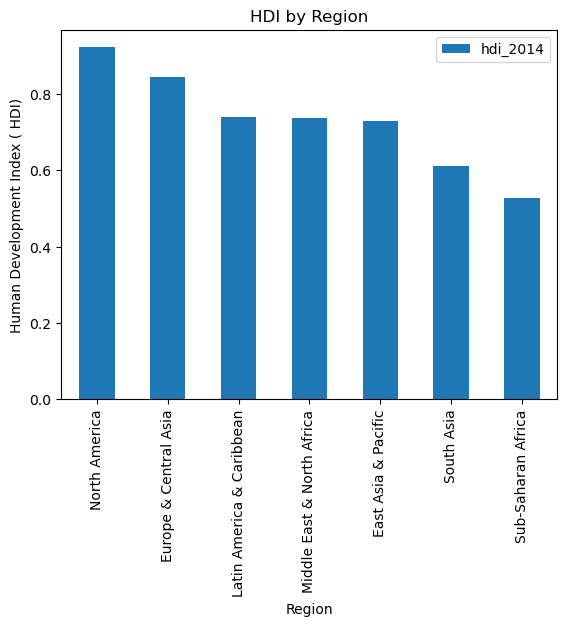

In [20]:
# --- Bar Plot: Average HDI by Region ---
# Plot a bar chart of HDI by region
wb_hdi_by_region.plot.bar(
    title = "HDI by Region", 
    ylabel = "Human Development Index ( HDI)"
)

[Text(0.5, 1.0, 'Electricity Drives Development')]

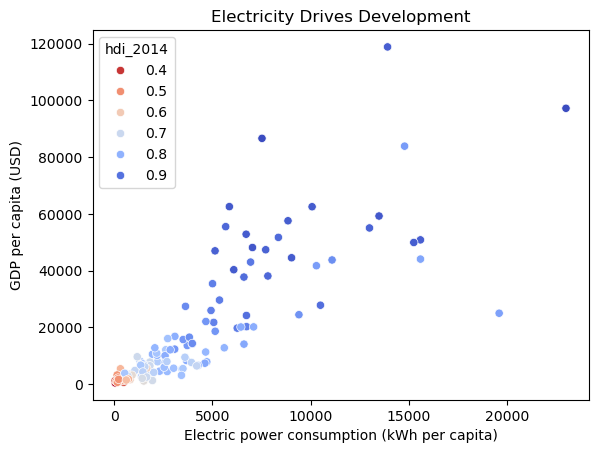

In [21]:
# --- Scatter Plot: Electricity Consumption vs GDP per Capita ---

# Create a scatter plot:
# - x-axis: Electric power consumption (kWh per capita)
# - y-axis: GDP per capita (USD)
# - hue: HDI value in 2014
# - palette: "coolwarm_r" → color range from high (cool) to low (warm)
# Iceland is excluded because it's an outlier
plot = sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue="hdi_2014",
    palette = "coolwarm_r"

)

# Add title to the plot
plot.set(title = "Electricity Drives Development")


# Objective 4
**Build a final report**

Your final objective is to structure your visualizations into a compelling report on the state of the global economy.

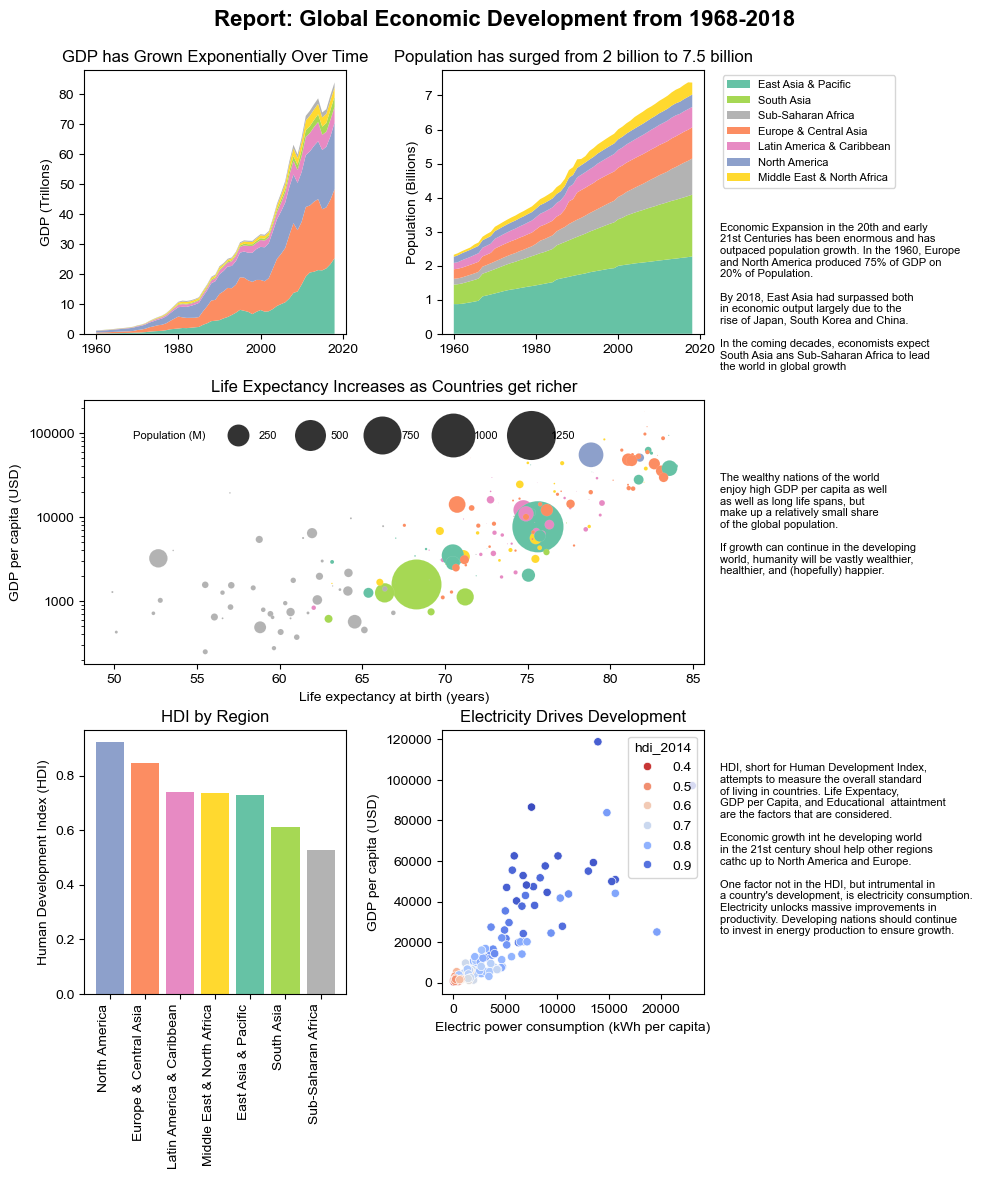

In [101]:
# Import required libraries
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.collections import PathCollection


# Create the figure and GridSpec layout
fig = plt.figure(figsize=(8,12))
gs = gridspec.GridSpec(nrows=12, ncols=6)

# Set global font to Arial
mpl.rcParams['font.family'] = "Arial"

# Color palettes for each chart
stack1_list = ['#66C2A5','#fC8D62','#8DA0CB','#E78AC3','#A6D854','#FFD92F','#B3B3B3']
stack2_list = ['#66C2A5','#A6D854','#B3B3B3','#fC8D62','#E78AC3', '#8DA0CB','#FFD92F']
bar_list = ['#8DA0CB','#fC8D62','#E78AC3','#FFD92F','#66C2A5','#A6D854','#B3B3B3']
bubble_list = ['#A6D854','#fC8D62','#FFD92F','#66C2A5','#B3B3B3','#E78AC3','#8DA0CB']

#Add title
fig.suptitle(
    "Report: Global Economic Development from 1968-2018",
    fontsize=16,
    fontweight="bold",
    x=.65,
    y=.93

)



# ===============================
# Chart 1 — Stacked Area: GDP by Region
ax1 = fig.add_subplot(gs[0:4, 0:3])

# Plot a stacked area chart:
# x-axis: Years
# - y-values: GDP of each region (divided by 1,000,000,000,000 to convert to trillions)
# - Regions are sorted by the most recent year's GDP in descending order
ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 
     for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= gdp_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack1_list
)


# Add title and y-axis label
ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillons)")

fig.text(0.92,0.62,
'''
Economic Expansion in the 20th and early 
21st Centuries has been enormous and has
outpaced population growth. In the 1960, Europe 
and North America produced 75% of GDP on 
20% of Population.

By 2018, East Asia had surpassed both
in economic output largely due to the 
rise of Japan, South Korea and China.

In the coming decades, economists expect
South Asia ans Sub-Saharan Africa to lead
the world in global growth
'''

, fontsize =8)



# ===============================
# Chart 2 — Stacked Area: Population by Region
ax2 = fig.add_subplot(gs[0:4, 3:6])

# Plot a stacked area chart:
# - x-axis: Years
# - y-values: Population of each region (divided by 1000 to convert from millions to billions)
# - Regions are sorted by the most recent year's population in descending order
ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 
     for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= pop_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stack2_list
)

# Add title and y-axis label
ax2.set_title("Population has surged from 2 billion to 7.5 billion")
ax2.set_ylabel("Population (Billions)")

# Add a legend
ax2.legend(bbox_to_anchor=(1.75, 1), fontsize=8)


# ===============================
# Chart 3 — Bubble Scatter: Life Expectancy vs GDP per Capita
ax3 = fig.add_subplot(gs[4:8, :])

# Calculate the minimum and maximum population values (in millions)
# These will be used to scale the bubble sizes in the scatter plot
minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

# Create a scatter plot:
# - x-axis: Life expectancy at birth (years)
# - y-axis: GDP per capita (USD)
# - size: Population (M) → bubble size based on population
# - sizes=(minsize, maxsize) → scale bubble sizes between the smallest and largest population values
# - hue: Region → color points based on region
plot = sns.scatterplot(
    data=wb_hdi_2014,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes=(minsize,maxsize),
    hue="Region",
    palette=bubble_list,
    ax = ax3
)

# Set the y-axis to a logarithmic scale for better visualization of large value differences
plot.set(title="Life Expectancy Increases as Countries get richer", yscale="log")


# Format y-axis labels as normal numbers instead of scientific notation
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(wb_hdi_2014["Region"].unique())+1

for h in handles[1:]:
    if isinstance(h, PathCollection):  # Only scatter points
        sizes= [s / 1.5 for s in h.get_sizes()]
        h.set_sizes(sizes)

ax3.legend(
    handles[entries_to_skip:], 
    labels[entries_to_skip:], 
    bbox_to_anchor=(.8, .9), 
    borderaxespad=0.,
    frameon=False,
    ncol=6,
    fontsize=8
    
)

fig.text(.92,.45,
'''
The wealthy nations of the world
enjoy high GDP per capita as well
as well as long life spans, but
make up a relatively small share
of the global population.

If growth can continue in the developing
world, humanity will be vastly wealthier,
healthier, and (hopefully) happier.
'''

, fontsize =8)



    
# ===============================
# Chart 4 — Bar: Average HDI by Region
ax4 = fig.add_subplot(gs[8:12, 0:3])

# Draw bar chart manually to apply different colors per bar
regions = wb_hdi_by_region.index
values = wb_hdi_by_region.iloc[:, 0]

ax4.bar(regions, values, color=bar_list[:len(values)])

# Add title and y-axis label
ax4.set_title("HDI by Region")
ax4.set_ylabel("Human Development Index (HDI)")

# --- Fix overlapping x-axis labels ---
ax4.set_xticks(range(len(regions)))
ax4.set_xticklabels(regions, rotation=90, ha='right')


                                                                                                                    
# ===============================
# Chart 5 — Scatter: Electricity Consumption vs GDP per Capita
ax5 = fig.add_subplot(gs[8:12, 3:6])

# Create a scatter plot:
# - x-axis: Electric power consumption (kWh per capita)
# - y-axis: GDP per capita (USD)
# - hue: HDI value in 2014
# - palette: "coolwarm_r" → color range from high (cool) to low (warm)
# Iceland is excluded because it's an outlier
plot = sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x="Electric power consumption (kWh per capita)",
    y="GDP per capita (USD)",
    hue="hdi_2014",
    palette = "coolwarm_r",
    ax = ax5

)

# Add title to the plot
plot.set(title = "Electricity Drives Development")

fig.text(.92,.15,
'''
HDI, short for Human Development Index,
attempts to measure the overall standard 
of living in countries. Life Expentacy,
GDP per Capita, and Educational  attaintment
are the factors that are considered.

Economic growth int he developing world 
in the 21st century shoul help other regions
cathc up to North America and Europe.

One factor not in the HDI, but intrumental in
a country's development, is electricity consumption.
Electricity unlocks massive improvements in
productivity. Developing nations should continue
to invest in energy production to ensure growth.
'''

, fontsize =8)


# Adjust spacing between subplots
fig.subplots_adjust(wspace=4, hspace=4)

**What was the correlation between GDP per capita and HDI in the year 2014?**

In [121]:
# Calculate correlation between GDP per capita and HDI for 2014
correlation = wb_hdi_2014['GDP per capita (USD)'].corr(wb_hdi_2014['hdi_2014'])
print("Correlation (GDP per capita vs HDI, 2014):", correlation)


Correlation (GDP per capita vs HDI, 2014): 0.6493061439126981


**Interpretation:**

- `Correlation close to +1` → strong positive relationship: higher GDP per capita generally corresponds to higher HDI.

- `Correlation close to 0` → little or no linear relationship.

- `Correlation close to -1` → strong negative relationship.

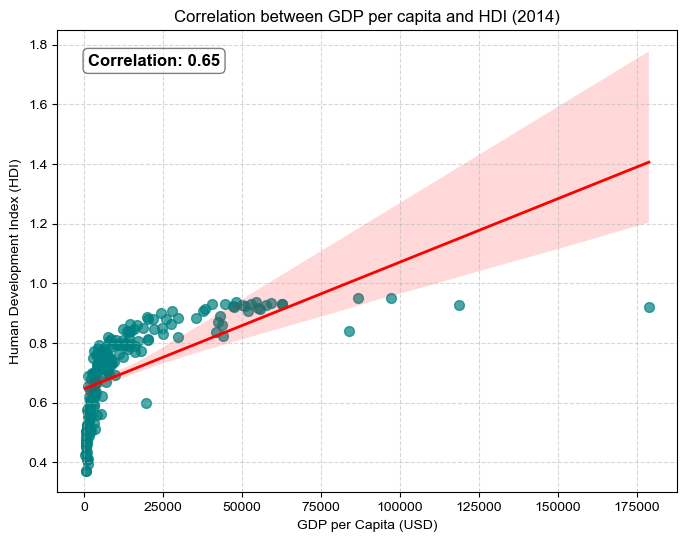

In [123]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter Plot: GDP vs HDI (2014) ---
fig, ax = plt.subplots(figsize=(8,6))


# Scatter + regression line
sns.regplot(
    data=wb_hdi_2014,
    x='GDP per capita (USD)',
    y='hdi_2014',
    scatter_kws={'s':50, 'alpha':0.7, 'color':'teal'},
    line_kws={'color':'red', 'linewidth':2},
    ax=ax
)


# Title and axes
ax.set_title("Correlation between GDP per capita and HDI (2014)")
ax.set_xlabel("GDP per Capita (USD)")
ax.set_ylabel("Human Development Index (HDI)")
ax.grid(True, linestyle='--', alpha=0.5)

# --- Calculate and format correlation ---
correlation = wb_hdi_2014['GDP per capita (USD)'].corr(wb_hdi_2014['hdi_2014'])
ax.text(
    0.05, 0.95,  # position in the upper left corner of the figure
    f'Correlation: {correlation:.2f}',
    transform=ax.transAxes,
    fontsize=12,
    fontweight='bold',
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5)
)

plt.show()
